# Multivariate Analysis
## Adopted workflow from Dr. Pryzc (UT-Austin)

### Objective:
To create different multivariate (multi-variable) models of subsurface sample statistics while integrating uncertainty. Uses the GSLIB and Geostats.py library and the data set in my repository: sample_data_MV_biased.

Now we will import the GSLIB, geostats.py, and other standard libraries for visualing data and data analysis

In [2]:
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats
import pandas as pd
import numpy as np
import os
from scipy import stats
import matplotlib.pyplot as plt
import scipy.signal as signal    #kernel for moving window calculation
import random
import math
import seaborn as sns            #data visualization tool from matplotlib

Next we will set up the directory for files to be saved to

In [3]:
os.chdir("/Users/AlexDodd/Desktop/Python Practice/Multivariate Analysis")

Now we will load in our tabular data or data frame. The file should be in our repository on Github names sample_data_MV_biased. The file will be shown soon, but contains x and y (m) locations for various wells, porisity (fraction), permeability (mD) , and acoustic impedance.

In [4]:
df = pd.read_csv('sample_data_MV_biased.csv')
df.head()                                       #Shows first few tables

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,0,100.0,900.0,0.0,0.101319,1.996868,5590.417154
1,1,100.0,800.0,1.0,0.147676,10.711789,3470.845666
2,2,100.0,700.0,1.0,0.145912,17.818143,3586.988513
3,3,100.0,600.0,1.0,0.186167,217.109365,3732.114787
4,4,100.0,500.0,1.0,0.146088,16.717367,2534.551236


In [5]:
df.describe().transpose()   #quickly view summary statistcs for each column of data

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,368.0,293.260870,169.058258,0.000000,150.500000,296.000000,439.500000,586.000000
X,368.0,499.565217,289.770794,0.000000,240.000000,500.000000,762.500000,990.000000
Y,368.0,520.644022,277.412187,9.000000,269.000000,539.000000,769.000000,999.000000
Facies,368.0,0.597826,0.491004,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,368.0,0.127026,0.030642,0.041122,0.103412,0.125842,0.148623,0.210258
Perm,368.0,85.617362,228.362654,0.094627,2.297348,10.377292,50.581288,1991.097723
AI,368.0,4791.736646,974.560569,1981.177309,4110.728374,4713.325533,5464.043562,7561.250336


### Visualizing Data on a Map
Now we will visualize the data on a color map. Setting the minumum values outside the min max for the coordinates for better results. 

In [6]:
xmin=0; xmax=1000;
ymin=0; ymax=1000;
por_min= 0.03; por_max=.25;
perm_min=.05; perm_max=2000;
AI_min=1500; AI_max=8000;      #range of all of our tabular data
nx =100; ny = 100;             #number of points in x and y direction
csize=10;
cmap=plt.cm.plasma            #color map

Now that we have our min and max points established, we will use locmaps instead matplotpyplot from the GSLIB library to populate some of the maps 

In [7]:
GSLIB.locmap_st

<function geostatspy.GSLIB.locmap_st(df, xcol, ycol, vcol, xmin, xmax, ymin, ymax, vmin, vmax, title, xlabel, ylabel, vlabel, cmap)>

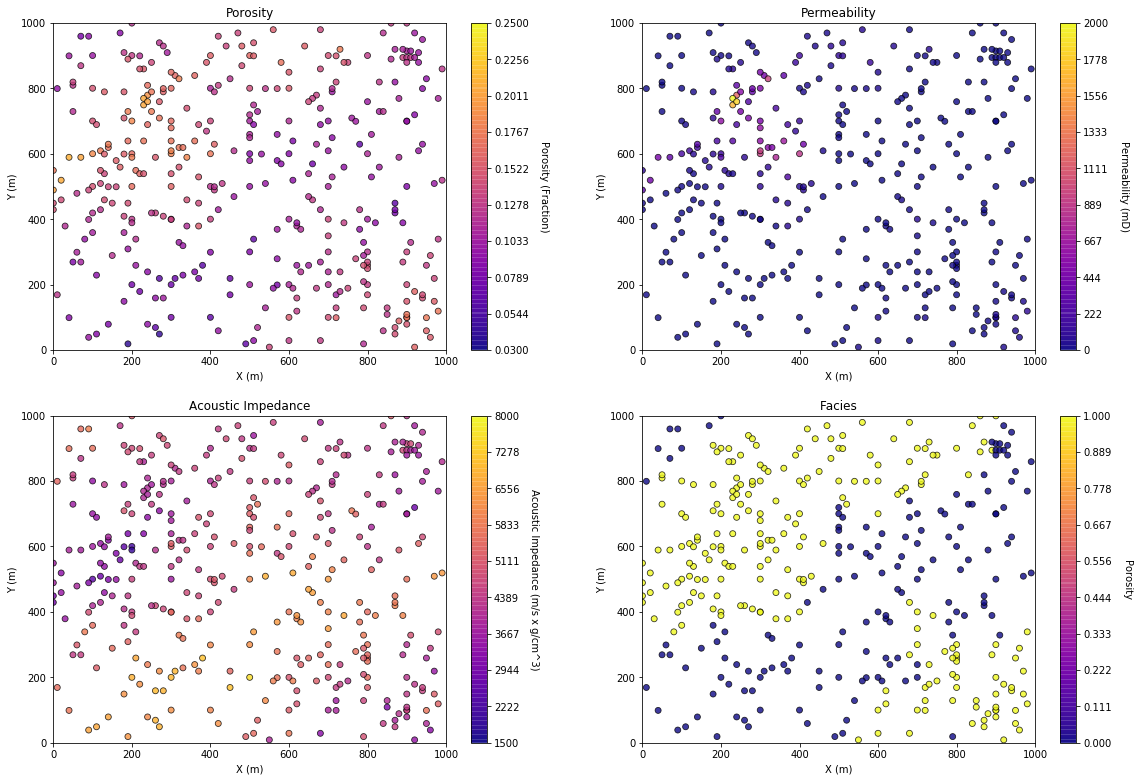

In [8]:
plt.subplot(221)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,por_min,por_max,title='Porosity', 
             xlabel='X (m)',ylabel = 'Y (m)',vlabel='Porosity (Fraction)', cmap=cmap)

plt.subplot(222)
GSLIB.locmap_st(df,'X','Y','Perm',xmin,xmax,ymin,ymax,perm_min,perm_max,title='Permeability', 
             xlabel='X (m)',ylabel = 'Y (m)',vlabel='Permeability (mD)', cmap=cmap)

plt.subplot(223)
GSLIB.locmap_st(df,'X','Y','AI',xmin,xmax,ymin,ymax,AI_min,AI_max,title='Acoustic Impedance', 
             xlabel='X (m)',ylabel = 'Y (m)',vlabel='Acoustic Impedance (m/s x g/cm^3)', cmap=cmap)

plt.subplot(224)
GSLIB.locmap_st(df,'X','Y','Facies',xmin,xmax,ymin,ymax,0,1,title='Facies', 
             xlabel='X (m)',ylabel = 'Y (m)',vlabel='Porosity', cmap=cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=2.5, wspace=.2, hspace=0.2)
plt.show()

# Bivariate Analysis
Now we will look at two variables at a time,and then we will calculate covariance and correlation

In [9]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

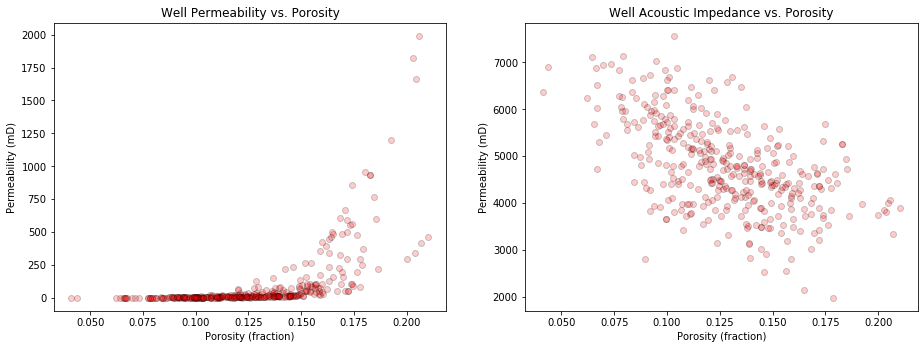

In [10]:
plt.subplot(121)
plt.plot(df['Porosity'].values,df['Perm'].values,'o',label='',color='red', markeredgecolor='black',alpha=0.2)
plt.title('Well Permeability vs. Porosity')
plt.xlabel('Porosity (fraction)')
plt.ylabel('Permeability (mD)');

plt.subplot(122)
plt.plot(df['Porosity'].values,df['AI'].values,'o',label='',color='red', markeredgecolor='black',alpha=0.2)
plt.title('Well Acoustic Impedance vs. Porosity')
plt.xlabel('Porosity (fraction)')
plt.ylabel('Permeability (mD)');

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.2)

Plotting two variables together shows how the two are related in the most basic sense (i.e. Porosity increases as Permeability increases). Now we will calculate the covariance (degree of of much vairable vary with each other).

In [11]:
print(df.iloc[:,3:7].cov())                    # the covariance matrix for columns 3,4,5 and 6 and all rows
print('The variance of porosity is ' + str(round(np.var(df['Porosity'].values),6)))

              Facies   Porosity          Perm             AI
Facies      0.241085   0.011370     33.010926    -248.032706
Porosity    0.011370   0.000939      4.055029     -17.132244
Perm       33.010926   4.055029  52149.501968  -46471.695092
AI       -248.032706 -17.132244 -46471.695092  949768.302409
The variance of porosity is 0.000936


Next is the correlation coefficient matrix is

In [12]:
print(df.iloc[:,3:7].corr())                    # the correlation matrix for columns 3,4,5 and 6 and all rows

            Facies  Porosity      Perm        AI
Facies    1.000000  0.755682  0.294406 -0.518340
Porosity  0.755682  1.000000  0.579493 -0.573700
Perm      0.294406  0.579493  1.000000 -0.208812
AI       -0.518340 -0.573700 -0.208812  1.000000


The matrix are read by locating which column you wish to analyze. For example, looking at Porosity covariance, then looking up to permeability, you can see they correlate ~ .57

# Multivariate Analyis
Using matrix scatter plots to analyze three or more data pairs to do analysis on: the range, homoscedastic/heteroscedastic behavior, non-linear features. Below is similar to the matrix set up for the covariance and correlation matrix, but shown graphically for all of the variables.

In [13]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

/Users/AlexDodd/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/AlexDodd/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


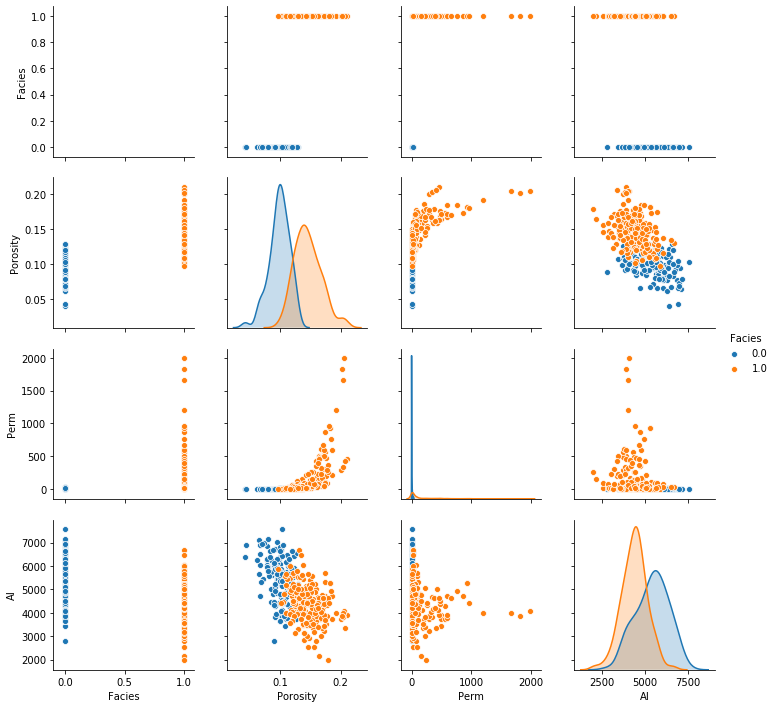

In [14]:
sns.pairplot(df, hue='Facies',vars=['Facies','Porosity','Perm','AI'],markers='o')

## Conditional Statistics
Now we can calculate conditional statistics by hand for any two columns. First we will do Porosity given certain Acoustic Impedance (ie we have acoustic impedance of such value, what is the probability we have porosity of these values).

In [15]:
AI_bins = np.linspace(1000,8000,10)        #sets the bin boundaries
AI_centroids= np.linspace((AI_bins[0]+AI_bins[1])*0.5,(AI_bins[8]+AI_bins[9])*0.5,9)   #sets centroids
df['AI_bins']=pd.cut(df['AI'],AI_bins,labels=AI_centroids)   #cuts the boundaries and sets the centroid labels
df.head()   #shows a snapshot of the data file, we have created bins for the acoustic impedance 

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI,AI_bins
0,0,100.0,900.0,0.0,0.101319,1.996868,5590.417154,5277.777778
1,1,100.0,800.0,1.0,0.147676,10.711789,3470.845666,3722.222222
2,2,100.0,700.0,1.0,0.145912,17.818143,3586.988513,3722.222222
3,3,100.0,600.0,1.0,0.186167,217.109365,3732.114787,3722.222222
4,4,100.0,500.0,1.0,0.146088,16.717367,2534.551236,2166.666667


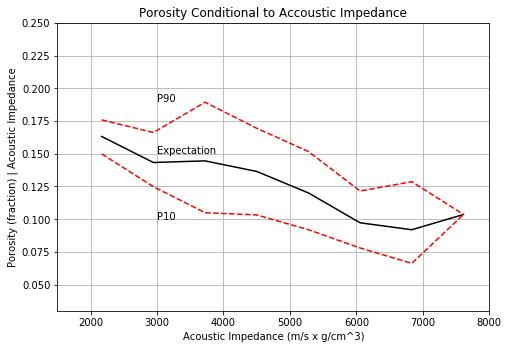

In [27]:
cond_exp=df.groupby('AI_bins')['Porosity'].mean()
cond_P90=df.groupby('AI_bins')['Porosity'].quantile(0.9)
cond_P10=df.groupby('AI_bins')['Porosity'].quantile(0.1)

plt.subplot(111)
plt.plot(AI_centroids,cond_exp,color='black')
plt.plot(AI_centroids,cond_P90,'r--')
plt.plot(AI_centroids,cond_P10,'r--')
plt.grid(True)
plt.xlabel('Acoustic Impedance (m/s x g/cm^3)')
plt.ylabel('Porosity (fraction) | Acoustic Impedance')
t = plt.title('Porosity Conditional to Accoustic Impedance')
plt.ylim(por_min,por_max)
plt.xlim(AI_min,AI_max)
plt.text(3000,0.19,'P90')
plt.text(3000,0.10,'P10')
plt.text(3000,0.15,'Expectation')

plt.subplots_adjust(left=0, bottom=0,right=1.0,top=1.0,wspace=0.2,hspace=0.2)

What we can gather from this chart is the acoustic impedance clearly affects expected porosity (given lower acoustic impedance, higher porosity and vice versa). This can be done for all of the variables by just changing the chart dimensions and input variables. Machine Learning is also a helpful tool for understanding multivariate analysis as this document explores conditional probablilities and matrices and bivariate analysis.

# By: Alex Dodd
alexdodd@utexas.edu